<a href="https://colab.research.google.com/github/dazzerz/Case-Study-03-Data-Mining-UIN-Ganjil-2022-Kelompok-8/blob/main/Study_Case_Kelompok_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT DATA

In [224]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

%matplotlib inline
plt.style.use('bmh'); sns.set()

In [225]:
#Import dataset
df = pd.read_excel('https://github.com/dazzerz/Case-Study-03-Data-Mining-UIN-Ganjil-2022-Kelompok-8/blob/main/data/Kasus-AR-MBA-Ganjil-2022-UIN.xlsx?raw=true', sheet_name='Transaksi')
df

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1.0,2022-07-01,Mr. A,1,Roti,Sri Roti,2
1,NaN,NaT,NaN,2,Air Minum,Aquos,1
2,NaN,NaT,NaN,11,Mie Instan,Indomi,2
3,NaN,NaT,NaN,12,Mie Instan,Mi Sedap,1
4,2.0,2022-07-01,Mr. B,2,Air Minum,Aquos,1
5,NaN,NaT,NaN,6,Snack,Chiki,2
6,NaN,NaT,NaN,3,Roti,Prambanan,1
7,NaN,NaT,NaN,5,Shampoo,Clean,1
8,3.0,2022-07-02,Mr. C,4,Sabun,Lifboy,1
9,NaN,NaT,NaN,5,Shampoo,Clean,1


# PREPROCESSING DATA

In [226]:
#Preprocessing
#Mengatasi MV
df.ffill(inplace = True)
#Mengubah type data variable ID Transaksi menjadi str
df['ID Transaksi'] = df['ID Transaksi'].astype('str')
df['ID Produk'] = df['ID Produk'].astype('str')
#Menghapus 'koma' pada variable ID Transaksi dan membulatkan nilainya
df['ID Transaksi'] = df['ID Transaksi'].str.replace('.', '')
df['ID Transaksi'] = df['ID Transaksi'].str.replace('0', '')
df

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1,2022-07-01,Mr. A,1,Roti,Sri Roti,2
1,1,2022-07-01,Mr. A,2,Air Minum,Aquos,1
2,1,2022-07-01,Mr. A,11,Mie Instan,Indomi,2
3,1,2022-07-01,Mr. A,12,Mie Instan,Mi Sedap,1
4,2,2022-07-01,Mr. B,2,Air Minum,Aquos,1
5,2,2022-07-01,Mr. B,6,Snack,Chiki,2
6,2,2022-07-01,Mr. B,3,Roti,Prambanan,1
7,2,2022-07-01,Mr. B,5,Shampoo,Clean,1
8,3,2022-07-02,Mr. C,4,Sabun,Lifboy,1
9,3,2022-07-02,Mr. C,5,Shampoo,Clean,1


In [227]:
#Cek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID Transaksi  56 non-null     object        
 1   Tanggal       56 non-null     datetime64[ns]
 2   Konsumen      56 non-null     object        
 3   ID Produk     56 non-null     object        
 4   Nama Produk   56 non-null     object        
 5   Merek         56 non-null     object        
 6   Jumlah        56 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 3.2+ KB


### Data Dictionary
ID Transaksi - ID customer yang sudah membeli produk. Data bertipe string/object.

Tanggal - Tanggal pembelian produk. Data bertipe datetime64.

Konsumen - Nama seseorang yang telah membeli produk. Data bertipe string/object.

ID Produk - ID dari setiap produk untuk menandakan produk tersebut. Data bertipe string/object.

Nama Produk - Jenis dari produk yang ada dalam data. Data bertipe string/object.

Merek - Merek dari produk yang ada dalam data. Data bertipe string/object.

Jumlah - Total banyak produk yang sudah dibeli oleh customer. Data bertipe int64.


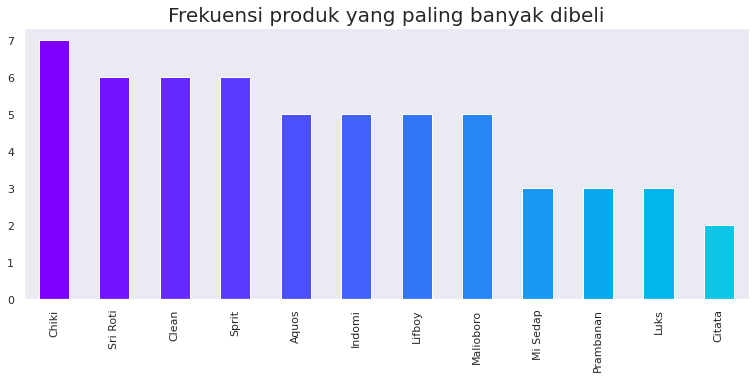

In [228]:
#Visualisasi frekuensi produk yang paling banyak diebli
color = plt.cm.rainbow(np.linspace(0, 1, 40))
df['Merek'].value_counts().plot.bar(color = color, figsize=(13,5))
plt.title('Frekuensi produk yang paling banyak dibeli', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

Dilihat dari output diatas, kita dapat melihat produk yang paling sering dibeli adalah chiki, dan yang paling jarang dibeli yaitu Citata. Maka dari itu kita akan melakukan market basket analysis untuk membuat produk-produk dari toko supaya menjadi lebih laris dengan adanya bundling, promo atau diskon. Begitu pula untuk sabun mandi, Luks masih kurang peminat dibanding dengan sabun Lifboy. Agar pembelian dapat ditingkatkan, saran-saran yang diperlukan akan di paparkan di bawah ini.

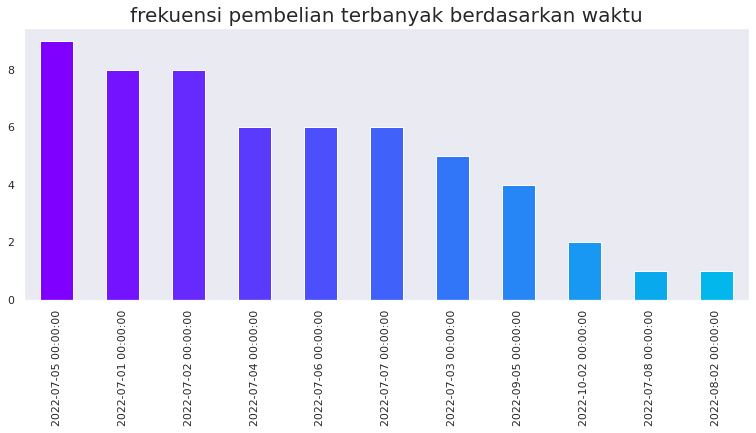

In [229]:
#Visualisasi pembelian terbanyak berdasarkan waktu
color = plt.cm.rainbow(np.linspace(0, 1, 40))
df['Tanggal'].value_counts().plot.bar(color = color, figsize=(13,5))
plt.title('frekuensi pembelian terbanyak berdasarkan waktu', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

Dari plot di atas dapat terlihat pembelian produk paling banyak ada pada tanggal 5 bulan 7, dan pembelian produk paling sedikit ada pada tanggal 8 bulan 7 dan tanggal 2 bulan 8.

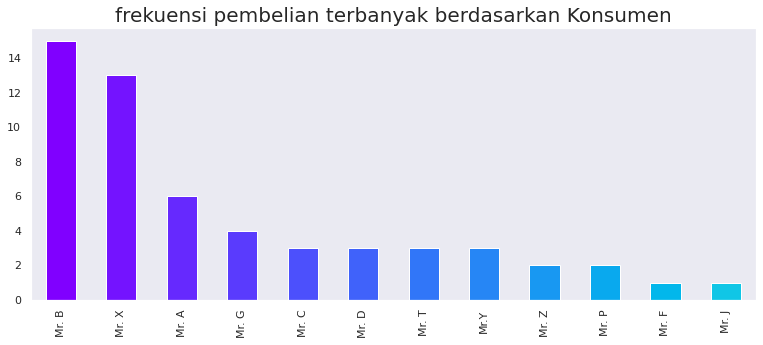

In [230]:
#Visualisasi pembelian terbanyak berdasarkan konsumen
color = plt.cm.rainbow(np.linspace(0, 1, 40))
df['Konsumen'].value_counts().plot.bar(color = color, figsize=(13,5))
plt.title('frekuensi pembelian terbanyak berdasarkan Konsumen', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

Dilihat dari output diatas, kita dapat mengetahui siapa orang yang membeli produk paling banyak di toko adalah Mr. B.
Agar orang lain selain Mr. B akan membeli produk lagi maka kita rekomendasikan untuk membuat kartu member, yang kedepannya jika ada kustomer yang mempunyai kartu member tersebut maka toko akan memberikan promo seperti diskon.

# Market Basket Analysis berdasarkan Nama Produk

In [231]:
#Group variable ID Transaksi, Nama Produk dan Jumlah
basket1 = df
basket1 = basket1.groupby(['ID Transaksi', 'Nama Produk'])['Jumlah']
basket1.head()

0     2
1     1
2     2
3     1
4     1
5     2
6     1
7     1
8     1
9     1
10    1
11    2
12    2
13    3
14    1
15    2
16    1
17    2
18    2
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    3
27    2
28    1
29    1
30    2
31    1
32    2
33    1
34    2
35    2
36    2
37    1
38    2
39    1
40    2
41    1
42    1
43    2
44    1
45    2
46    2
47    1
48    1
49    2
50    2
51    1
52    1
53    2
54    2
55    2
Name: Jumlah, dtype: int64

In [232]:
#Unstack, penjumlahan dan mengisi missing na
basket1 = basket1.sum().unstack().reset_index().fillna(0).set_index('ID Transaksi')
basket1.head(5)

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
1,3.0,3.0,0.0,3.0,0.0,0.0,2.0
11,0.0,0.0,1.0,2.0,0.0,0.0,0.0
12,0.0,3.0,0.0,0.0,2.0,1.0,0.0
13,1.0,0.0,0.0,1.0,0.0,0.0,2.0
14,0.0,0.0,0.0,0.0,2.0,2.0,1.0


In [233]:
def integer(x):
    if x <= 0:
        return 0
    if x >= 1 :
        return 1
    
basket_sets1 = basket1.applymap(integer)
basket_sets1

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
1,1,1,0,1,0,0,1
11,0,0,1,1,0,0,0
12,0,1,0,0,1,1,0
13,1,0,0,1,0,0,1
14,0,0,0,0,1,1,1
15,0,0,1,0,0,0,0
16,1,0,0,0,0,0,0
17,1,0,0,1,1,0,1
18,1,0,0,1,0,0,0


In [234]:
basket_sets1.columns

Index(['Air Minum', 'Mie Instan', 'Rokok', 'Roti', 'Sabun', 'Shampoo',
       'Snack'],
      dtype='object', name='Nama Produk')

In [235]:
basket_sets1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 1 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Air Minum   17 non-null     int64
 1   Mie Instan  17 non-null     int64
 2   Rokok       17 non-null     int64
 3   Roti        17 non-null     int64
 4   Sabun       17 non-null     int64
 5   Shampoo     17 non-null     int64
 6   Snack       17 non-null     int64
dtypes: int64(7)
memory usage: 1.1+ KB


In [236]:
basket_sets1.index

Index(['1', '11', '12', '13', '14', '15', '16', '17', '18', '2', '3', '4', '5',
       '6', '7', '8', '9'],
      dtype='object', name='ID Transaksi')

In [237]:
basket_sets1.iloc[1].sum()

2

In [238]:
basket_sets1.iloc[1]

Nama Produk
Air Minum     0
Mie Instan    0
Rokok         1
Roti          1
Sabun         0
Shampoo       0
Snack         0
Name: 11, dtype: int64

In [239]:
frequent_itemsets1 = apriori(basket_sets1, min_support=0.06, use_colnames=True)
frequent_itemsets1.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets1

,support,itemsets
0,0.588235,(Air Minum)
6,0.529412,(Snack)
3,0.470588,(Roti)
4,0.470588,(Sabun)
9,0.411765,"(Roti, Air Minum)"
11,0.411765,"(Snack, Air Minum)"
27,0.352941,"(Roti, Snack, Air Minum)"
5,0.352941,(Shampoo)
1,0.352941,(Mie Instan)
19,0.352941,"(Roti, Snack)"


In [240]:
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=1)
rules1.sort_values(by='lift', ascending=False, na_position='last', inplace = True)
rules1.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
115,"(Sabun, Air Minum)","(Roti, Mie Instan)",0.176471,0.176471,0.117647,0.666667,3.777778,0.086505,2.470588
170,"(Mie Instan, Air Minum)","(Roti, Snack, Sabun)",0.176471,0.176471,0.117647,0.666667,3.777778,0.086505,2.470588
160,"(Mie Instan, Snack, Air Minum)","(Roti, Sabun)",0.176471,0.176471,0.117647,0.666667,3.777778,0.086505,2.470588
161,"(Roti, Sabun)","(Mie Instan, Snack, Air Minum)",0.176471,0.176471,0.117647,0.666667,3.777778,0.086505,2.470588
157,"(Snack, Sabun, Air Minum)","(Roti, Mie Instan)",0.176471,0.176471,0.117647,0.666667,3.777778,0.086505,2.470588
164,"(Roti, Mie Instan)","(Snack, Sabun, Air Minum)",0.176471,0.176471,0.117647,0.666667,3.777778,0.086505,2.470588
166,"(Sabun, Air Minum)","(Roti, Snack, Mie Instan)",0.176471,0.176471,0.117647,0.666667,3.777778,0.086505,2.470588
151,"(Roti, Snack, Sabun)","(Mie Instan, Air Minum)",0.176471,0.176471,0.117647,0.666667,3.777778,0.086505,2.470588
155,"(Roti, Snack, Mie Instan)","(Sabun, Air Minum)",0.176471,0.176471,0.117647,0.666667,3.777778,0.086505,2.470588
114,"(Roti, Sabun)","(Air Minum, Mie Instan)",0.176471,0.176471,0.117647,0.666667,3.777778,0.086505,2.470588


Interpretasi :

Barang yang paling sering dibeli bersamaan adala Roti, Air Minum, Sabun, dan Mie Instan.

In [241]:
rules1.sort_values(by='support', ascending=False, na_position='last', inplace = True)
rules1.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(Air Minum),(Snack),0.588235,0.529412,0.411765,0.700000,1.322222,0.100346,1.568627
1,(Air Minum),(Roti),0.588235,0.470588,0.411765,0.700000,1.487500,0.134948,1.764706
0,(Roti),(Air Minum),0.470588,0.588235,0.411765,0.875000,1.487500,0.134948,3.294118
2,(Snack),(Air Minum),0.529412,0.588235,0.411765,0.777778,1.322222,0.100346,1.852941
11,(Snack),(Roti),0.529412,0.470588,0.352941,0.666667,1.416667,0.103806,1.588235
6,"(Snack, Air Minum)",(Roti),0.411765,0.470588,0.352941,0.857143,1.821429,0.159170,3.705882
7,(Roti),"(Snack, Air Minum)",0.470588,0.411765,0.352941,0.750000,1.821429,0.159170,2.352941
8,(Snack),"(Roti, Air Minum)",0.529412,0.411765,0.352941,0.666667,1.619048,0.134948,1.764706
5,"(Roti, Air Minum)",(Snack),0.411765,0.529412,0.352941,0.857143,1.619048,0.134948,3.294118
9,(Air Minum),"(Roti, Snack)",0.588235,0.352941,0.352941,0.600000,1.700000,0.145329,1.617647


Interpretasi :

Menurut data di atas, kebiasaan pelanggan membeli Air Minum dibarengi dengan pembelian Snack atau Roti. Untuk lebih meningkatkan penjualan barang yang lain juga, ada baiknya rak untuk Air Minum, Roti, dan Snack dijauhkan agar dapat melihat barang-barang yang lain.

In [242]:
rules1.sort_values(by='support', ascending=True, na_position='last', inplace = True)
rules1.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
174,(Air Minum),"(Roti, Snack, Sabun, Mie Instan)",0.588235,0.117647,0.117647,0.200000,1.700000,0.048443,1.102941
133,"(Roti, Snack, Mie Instan)",(Sabun),0.176471,0.470588,0.117647,0.666667,1.416667,0.034602,1.588235
101,"(Roti, Mie Instan)",(Sabun),0.176471,0.470588,0.117647,0.666667,1.416667,0.034602,1.588235
102,(Sabun),"(Roti, Mie Instan)",0.470588,0.176471,0.117647,0.250000,1.416667,0.034602,1.098039
104,"(Snack, Shampoo)",(Sabun),0.176471,0.470588,0.117647,0.666667,1.416667,0.034602,1.588235
115,"(Sabun, Air Minum)","(Roti, Mie Instan)",0.176471,0.176471,0.117647,0.666667,3.777778,0.086505,2.470588
163,"(Roti, Air Minum)","(Snack, Sabun, Mie Instan)",0.411765,0.176471,0.117647,0.285714,1.619048,0.044983,1.152941
162,"(Roti, Snack)","(Mie Instan, Sabun, Air Minum)",0.352941,0.117647,0.117647,0.333333,2.833333,0.076125,1.323529
121,"(Air Minum, Snack, Mie Instan)",(Sabun),0.176471,0.470588,0.117647,0.666667,1.416667,0.034602,1.588235
139,"(Snack, Sabun)","(Roti, Mie Instan)",0.294118,0.176471,0.117647,0.400000,2.266667,0.065744,1.372549


Interpretasi :
1. Karena pembelian Sabun yang dibarengi dengan pembelian Mie Instant cukup jarang, maka toko dapat melakukan promo pembelian 5 Mie Instant dapat potongan harga untuk pembelian sabun.
2. Karena penjualan Mie Instan rendah, sedangkan penjualan Snack tinggi, sebaiknya toko meengadakan promo bundling Snack dan Mie Instan atau rak Mie Instan di tempatkan dekat dengan rak Snack.
3. Untuk menningkatkan penjualan shampoo, ada baiknya toko mengadakan bundling penjualan shampoo dan sabun, karena sabun cukup banyak dibeli oleh pelanggan dengan harga promo.

# Market Basket Analysis berdasarkan Merek

In [243]:
#Group variable ID Transaksi, Merek dan Jumlah
basket = df
basket = basket.groupby(['ID Transaksi', 'Merek'])['Jumlah']
basket.head()

0     2
1     1
2     2
3     1
4     1
5     2
6     1
7     1
8     1
9     1
10    1
11    2
12    2
13    3
14    1
15    2
16    1
17    2
18    2
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    3
27    2
28    1
29    1
30    2
31    1
32    2
33    1
34    2
35    2
36    2
37    1
38    2
39    1
40    2
41    1
42    1
43    2
44    1
45    2
46    2
47    1
48    1
49    2
50    2
51    1
52    1
53    2
54    2
55    2
Name: Jumlah, dtype: int64

In [244]:
#Unstack, penjumlahan dan mengisi missing na
basket = basket.sum().unstack().reset_index().fillna(0).set_index('ID Transaksi')
basket.head(5)

Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
ID Transaksi,,,,,,,,,,,,
1,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
12,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0
13,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,0.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


In [245]:
def integer(x):
    if x <= 0:
        return 0
    if x >= 1 :
        return 1
    
basket_sets = basket.applymap(integer)
basket_sets

Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
ID Transaksi,,,,,,,,,,,,
1,1,1,0,0,1,0,0,0,1,1,1,1
11,0,0,0,0,0,0,0,1,0,1,0,0
12,0,0,0,1,1,1,0,0,1,0,0,0
13,0,0,1,0,0,0,0,0,0,0,1,1
14,0,1,0,1,0,0,1,0,0,0,0,0
15,0,0,0,0,0,0,0,1,0,0,0,0
16,1,0,0,0,0,0,0,0,0,0,0,0
17,1,1,0,0,0,1,0,0,0,0,0,1
18,0,0,0,0,0,0,0,0,0,0,1,1


In [246]:
basket_sets.columns

Index(['Aquos', 'Chiki', 'Citata', 'Clean', 'Indomi', 'Lifboy', 'Luks',
       'Malioboro', 'Mi Sedap', 'Prambanan', 'Sprit', 'Sri Roti'],
      dtype='object', name='Merek')

In [247]:
basket_sets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 1 to 9
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Aquos      17 non-null     int64
 1   Chiki      17 non-null     int64
 2   Citata     17 non-null     int64
 3   Clean      17 non-null     int64
 4   Indomi     17 non-null     int64
 5   Lifboy     17 non-null     int64
 6   Luks       17 non-null     int64
 7   Malioboro  17 non-null     int64
 8   Mi Sedap   17 non-null     int64
 9   Prambanan  17 non-null     int64
 10  Sprit      17 non-null     int64
 11  Sri Roti   17 non-null     int64
dtypes: int64(12)
memory usage: 1.7+ KB


In [248]:
basket_sets.index

Index(['1', '11', '12', '13', '14', '15', '16', '17', '18', '2', '3', '4', '5',
       '6', '7', '8', '9'],
      dtype='object', name='ID Transaksi')

In [249]:
basket_sets.iloc[1].sum()

2

In [250]:
basket_sets.iloc[1]

Merek
Aquos        0
Chiki        0
Citata       0
Clean        0
Indomi       0
Lifboy       0
Luks         0
Malioboro    1
Mi Sedap     0
Prambanan    1
Sprit        0
Sri Roti     0
Name: 11, dtype: int64

In [251]:
frequent_itemsets = apriori(basket_sets, min_support=0.06, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets

,support,itemsets
1,0.411765,(Chiki)
10,0.352941,(Sprit)
3,0.352941,(Clean)
11,0.352941,(Sri Roti)
0,0.294118,(Aquos)
4,0.294118,(Indomi)
5,0.294118,(Lifboy)
7,0.294118,(Malioboro)
12,0.235294,"(Aquos, Chiki)"
36,0.235294,"(Sprit, Sri Roti)"


In [252]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='lift', ascending=False, na_position='last', inplace = True)
rules.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
137,"(Aquos, Sri Roti)","(Lifboy, Chiki)",0.176471,0.117647,0.117647,0.666667,5.666667,0.096886,2.647059
138,"(Sri Roti, Chiki)","(Lifboy, Aquos)",0.176471,0.117647,0.117647,0.666667,5.666667,0.096886,2.647059
56,"(Sri Roti, Chiki)","(Indomi, Aquos)",0.176471,0.117647,0.117647,0.666667,5.666667,0.096886,2.647059
57,"(Indomi, Aquos)","(Sri Roti, Chiki)",0.117647,0.176471,0.117647,1.000000,5.666667,0.096886,inf
140,"(Lifboy, Chiki)","(Aquos, Sri Roti)",0.117647,0.176471,0.117647,1.000000,5.666667,0.096886,inf
139,"(Lifboy, Aquos)","(Sri Roti, Chiki)",0.117647,0.176471,0.117647,1.000000,5.666667,0.096886,inf
54,"(Indomi, Sri Roti)","(Aquos, Chiki)",0.117647,0.235294,0.117647,1.000000,4.250000,0.089965,inf
136,"(Lifboy, Sri Roti)","(Aquos, Chiki)",0.117647,0.235294,0.117647,1.000000,4.250000,0.089965,inf
68,(Citata),"(Sprit, Sri Roti)",0.117647,0.235294,0.117647,1.000000,4.250000,0.089965,inf
59,"(Aquos, Chiki)","(Indomi, Sri Roti)",0.235294,0.117647,0.117647,0.500000,4.250000,0.089965,1.764706


Interpretasi : 

Dapat dilihat berdasarkan output di atas rata-rata orang yang membeli Roti dengan merek Sri Roti akan membeli air minum dengan merek Aqous, untuk meningkatkan penjualan air minum merek lain kita bisa memberikan promo air minum merek lain apabila membeli Sri Roti. 

Untuk meningkatkan penjualan snack dengan merek Citata, kita bisa memberikan promo dengan dijadikan paket 2 air minum yang sering dibeli maka akan mendapat potongan harga untuk pembelian Citata.

In [253]:
rules.sort_values(by='support', ascending=False, na_position='last', inplace = True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Chiki),(Aquos),0.411765,0.294118,0.235294,0.571429,1.942857,0.114187,1.647059
2,(Sprit),(Sri Roti),0.352941,0.352941,0.235294,0.666667,1.888889,0.110727,1.941176
3,(Sri Roti),(Sprit),0.352941,0.352941,0.235294,0.666667,1.888889,0.110727,1.941176
0,(Aquos),(Chiki),0.294118,0.411765,0.235294,0.800000,1.942857,0.114187,2.941176
16,(Indomi),(Clean),0.294118,0.352941,0.176471,0.600000,1.700000,0.072664,1.617647
7,(Indomi),(Lifboy),0.294118,0.294118,0.176471,0.600000,2.040000,0.089965,1.764706
6,(Lifboy),(Indomi),0.294118,0.294118,0.176471,0.600000,2.040000,0.089965,1.764706
11,(Sri Roti),"(Aquos, Chiki)",0.352941,0.235294,0.176471,0.500000,2.125000,0.093426,1.529412
10,"(Aquos, Chiki)",(Sri Roti),0.235294,0.352941,0.176471,0.750000,2.125000,0.093426,2.588235
17,(Clean),(Indomi),0.352941,0.294118,0.176471,0.500000,1.700000,0.072664,1.411765


Interpretasi :

Menurut data di atas, kebiasaan pelanggan membeli Aquos dibarengi dengan pembelian Chiki. Untuk lebih meningkatkan penjualan yang lain juga, ada baiknya rak untuk Chiki dan Aquos dijauhkan agar dapat melihat barang yang lain contohnya snack dengan merek Citata.

In [254]:
rules.sort_values(by='support', ascending=True, na_position='last', inplace = True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
108,(Sprit),(Mi Sedap),0.352941,0.176471,0.117647,0.333333,1.888889,0.055363,1.235294
62,(Aquos),"(Indomi, Sri Roti, Chiki)",0.294118,0.117647,0.117647,0.400000,3.400000,0.083045,1.470588
138,"(Sri Roti, Chiki)","(Lifboy, Aquos)",0.176471,0.117647,0.117647,0.666667,5.666667,0.096886,2.647059
68,(Citata),"(Sprit, Sri Roti)",0.117647,0.235294,0.117647,1.000000,4.250000,0.089965,inf
56,"(Sri Roti, Chiki)","(Indomi, Aquos)",0.176471,0.117647,0.117647,0.666667,5.666667,0.096886,2.647059
57,"(Indomi, Aquos)","(Sri Roti, Chiki)",0.117647,0.176471,0.117647,1.000000,5.666667,0.096886,inf
140,"(Lifboy, Chiki)","(Aquos, Sri Roti)",0.117647,0.176471,0.117647,1.000000,5.666667,0.096886,inf
51,"(Indomi, Sri Roti, Chiki)",(Aquos),0.117647,0.294118,0.117647,1.000000,3.400000,0.083045,inf
139,"(Lifboy, Aquos)","(Sri Roti, Chiki)",0.117647,0.176471,0.117647,1.000000,5.666667,0.096886,inf
136,"(Lifboy, Sri Roti)","(Aquos, Chiki)",0.117647,0.235294,0.117647,1.000000,4.250000,0.089965,inf


Interpretasi : 
1. Karena penjualan Mie Sedap dan Citata kurang diminati maka kita dapat melakukan promo bundling, pembelian 5 Mi Sedap dapat 1 Citata ukuran besar.
2. Untuk meningkatkan pembelian shampoo merek Clean dan sabun merek Luks, disarankan toko mengadakan paket bundling untuk pembelian dua sabun Luks mendapat potongan harga untuk pembelian shampoo merek Clean.
3. Opsi selain nomor dua, untuk pengaturan rak. Lebih baik bagi toko jika menempatkan rak Lifboy dengan Luks yang diberi promo berdekatan.
4. Untuk meningkatkan pembelian Mi Sedap, dapat membuat promo membeli 5 Mie Sedap mendapat harga lebih murah.

Kesimpulan :
1. Pembelian air minum merek Aquos cukup tinggi dibandingkan dengan merek lain, sehingga diadakan promo untuk merek lain jika membeli Sri Roti.
2. Snack merek Citata jarang diminati oleh karena itu sebaiknya toko mengadakan promo untuk pembelian Citata yang dibarengi 2 air minum.
3. Opsi lain, karena pembelian Chiki yang dibarengi dengan Aquos tinggi, maka sebaiknya urutan rak menjadi solusinya, Citata lebih dekat dengan Aquos dibandingkan dengan Chiki.
4. Pengadaan promo bundling merek Mie Sedap, pembelian 5 Mie Sedap dapat 1 Citata ukuran besar.
5. Promo bundling juga diadakan untuk shampoo Clean dan sabun Luks, pembelian dua sabun Luks akan mendapat potongan harga shampoo Clean.
6. Opsi lain untuk penjualan Luks, pengaturan rak Lifboy dan Luks yang berpromo didekatkan.
7. Penjualan Mie Sedap dapat ditingkatkan dengan promo beli 5.

#Kesimpulan :


 



Penjualan barang di toko ini memperlihatkan barang-barang yang paling sering dan jarang dibeli, sehingga dibutuhkan saran-saran membangun untuk meningkatkan penjualan. Beberapa saran yang diberikan yaitu:
1. Karena pembelian air minum yang dibarengi dengan pembelian roti dan snack tinggi, maka sebaiknya toko menempatkan rak untuk Air Minum, Roti, dan Snack dijauhkan agar dapat melihat barang-barang yang lain.
2. Pemberian potongan harga pada pembelian sabun jika membeli 5 mie instan.
3. Pengadaan promo bundling untuk mie instan dan snack atau penempatan rak yang berdekatan.
4. Bundling shampoo dan sabun juga sebaiknya diadakan.

Adapun beberapa saran diatas yang bisa kami berikan kepada toko Alfaindo cabang AlfaIndo untuk menaikkan laba toko yang mengalami keterpurukan selama pandemi.